# Parameter estimation for linear regression models

Suppose we have observations of butyrate production (denoted as 'y') that we hypothesize to depend linearly on the abundance of a particular species, (for now call it 'x'). We can write this dependence as, 

$$
y = m \; x 
$$
where $m$ is an unknown *parameter* that we have to find. 

If we have $n$ observations of both the species abundance and the resulting butyrate production, then we change the notation to show the prediction of observation $i$ where $i = 1, ..., n$. 

$$
y_i = m \; x_i 
$$
Note that there's no index on $m$, since we only have one value of $m$ that we want to find. 

One way to estimate $m$ is to try to find the value that minimizes the squared difference between model predictions, $m x_i$ and measured values, $y_i$. 

$$
m^* = \underset{m}{\text{argmin}} \sum_{i = 1}^n (y_i - m \; x_i)^2 
$$
where the * notation is used to specify that $m^*$ is the optimal value for $m$. 

Here we'll solve this problem *numerically*, which means that we will use an optimizer in Python to minimize the sum of squares between measured and predicted values with respect to the regression coefficient, $m$.

### We can use numpy in Python to generate "simulated data"

To test the ability of models to fit data, or to test algorithms for fitting models to data, we often start by generating simulated data from a "ground truth" model. Ground truth means that we know what to expect from the data. 

In this case we can use the simulated data to test whether the equation for the optimal parameter $m^*$ is correct. 

In [1]:
# have to import library 
import numpy as np

# number of observations
n_obs = 30

# noise to add to true data
noise = 10 # percent Gaussian noise

# true value for parameter m 
m_true = 2. 

# random set of abundances drawn from uniformly from the interval [0, 1]
x = np.random.uniform(0, 1, n_obs)

# generate noisy observations of function 
y = m_true * x 
y = y + noise/100 * np.random.randn(n_obs)

### Start by visualizing the simulated data

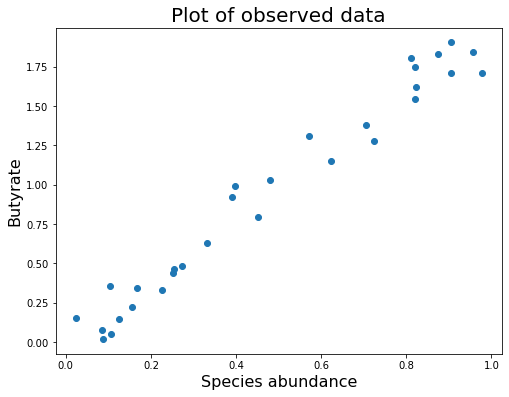

In [2]:
# have to import another library to generate plots 
import matplotlib.pyplot as plt 

# plot butyrate versus species abundance 
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel("Species abundance", fontsize=16)
plt.ylabel("Butyrate", fontsize=16)
plt.title("Plot of observed data", fontsize=20)
plt.show()

### Estimate the parameter, m

In [3]:
# Define the objective function, which takes the parameter to be optimized as an argument, 
# and returns the resulting value for sum of squares error 

def objective(m):
    # make predictions
    y_pred = m*x
    # compute sum of squares error (sse)
    sse = np.sum((y-y_pred)**2)

    return sse

In [4]:
# have to import a numerical optimizer from a Python library called "scipy"
from scipy.optimize import minimize 

# set an initial guess
m_guess = 1.

# the minimize function takes the objective function and an initial guess of m as inputs
results = minimize(objective, m_guess)
results

      fun: 0.4206836456669241
 hess_inv: array([[0.05047595]])
      jac: array([1.11758709e-08])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.9760635])

In [5]:
m_pred = results.x[0]
print(r"Estimated m*: {:.3f}".format(m_pred))

Estimated m*: 1.976


### Estimating the parameter did not require any additional math

While the analytical solution is faster and more accurate, it's usually not possible to find an analytical solution, so numerical solvers are sometimes necessary alternatives. 

### Test model predictions

Models are useful because we now have a way to make predictions of outcomes in previously unobserved circumstances. In this case our model is 

$$
y = m^* x
$$
so we can make predictions of $y$ for any new value of $x$. 

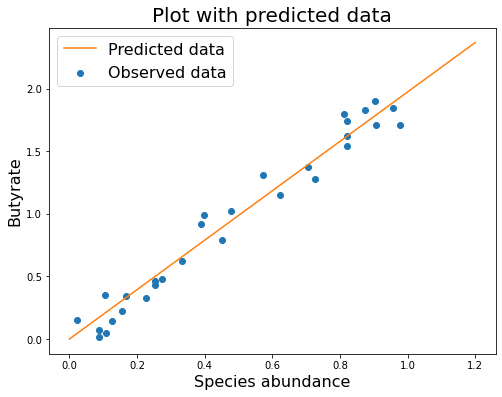

In [6]:
# set x to include values that weren't in the "training" data 
x_new = np.linspace(0, 1.2)
y_new = m_pred*x_new 

# plot butyrate versus species abundance 
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Observed data')
plt.plot(x_new, y_new, label='Predicted data', c='C1')

plt.legend(fontsize=16)
plt.xlabel("Species abundance", fontsize=16)
plt.ylabel("Butyrate", fontsize=16)
plt.title("Plot with predicted data", fontsize=20)
plt.show()